Creating an ANN model to predict customer churn by using tensorflow library. 
1. First will import all library.
2. load data
3. dividing data into dependent and independent variables
4. data cleaning , Encode target labels, feature scaling
5. Spliting data through train_test_split
6. Creating model.
7. Compiling model.
8. Predicting model
9. After prediction getting confusion metrix and accuracy score.

In [32]:
# Importing all necessary Libraries 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [33]:
# Loading data set
dataset=pd.read_csv('Customer_Churn_Modelling.csv')

In [34]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
# Differentiating data between dependent variable and independent variables

X=dataset.iloc[:,3:13]  # Independent variable

In [36]:
y=dataset['Exited'] # dependent variable

In [37]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [38]:
# Encode target labels 
#LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels to numerical labels

from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()
X['Geography']=label1.fit_transform(X['Geography'])

In [39]:
label2=LabelEncoder()
X['Gender']=label2.fit_transform(X['Gender'])

In [40]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [41]:
# Getting dummy
X=pd.get_dummies(X,drop_first=True,columns=['Geography'])

In [42]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [43]:
# feature scaling
from sklearn.preprocessing import StandardScaler

In [44]:
# dividing data into  X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0,stratify=y)

In [45]:
scaler=StandardScaler()

In [46]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [47]:
# creating model
model=Sequential()

In [48]:
# First layer

model.add(Dense(6, kernel_initializer='he_uniform', activation='relu',input_dim=X.shape[1]))

In [49]:
# Second layer
model.add(Dense(6, kernel_initializer='he_uniform', activation='relu'))

In [50]:
# third layer (Output layer)
model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [51]:
# getting model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compiling model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
# Fitting model
compute=model.fit(X_train,y_train,validation_split=0.33, batch_size=10,epochs=20,verbose=1)

Epoch 1/20
536/536 [==============================] - 2s 3ms/step - loss: 0.6838 - accuracy: 0.6288 - val_loss: 0.5067 - val_accuracy: 0.7982
Epoch 2/20
536/536 [==============================] - 2s 3ms/step - loss: 0.5035 - accuracy: 0.7908 - val_loss: 0.4641 - val_accuracy: 0.8065
Epoch 3/20
536/536 [==============================] - 2s 3ms/step - loss: 0.4661 - accuracy: 0.7960 - val_loss: 0.4391 - val_accuracy: 0.8152
Epoch 4/20
536/536 [==============================] - 2s 3ms/step - loss: 0.4398 - accuracy: 0.8175 - val_loss: 0.4223 - val_accuracy: 0.8228
Epoch 5/20
536/536 [==============================] - 2s 3ms/step - loss: 0.4178 - accuracy: 0.8240 - val_loss: 0.4084 - val_accuracy: 0.8281
Epoch 6/20
536/536 [==============================] - 2s 3ms/step - loss: 0.4048 - accuracy: 0.8262 - val_loss: 0.3964 - val_accuracy: 0.8330
Epoch 7/20
536/536 [==============================] - 2s 3ms/step - loss: 0.3877 - accuracy: 0.8390 - val_loss: 0.3874 - val_accuracy: 0.8368
Epoch 

In [54]:
print(compute.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


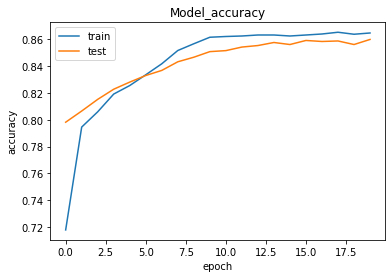

In [55]:
# Graphical presentation of accuracy and validation accuracy

plt.plot(compute.history['accuracy'])
plt.plot(compute.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

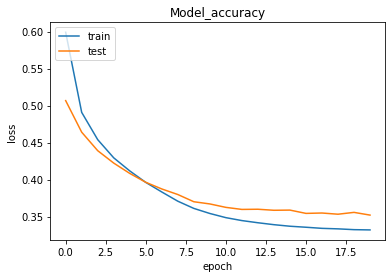

In [56]:
# Graphical presentation of loss and validation loss

plt.plot(compute.history['loss'])
plt.plot(compute.history['val_loss'])
plt.title('Model_accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
# getting prediction
y_pred=model.predict_classes(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [58]:
# evaluating model
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8590


[0.3477667272090912, 0.859000027179718]

In [59]:
# Getting confuion metrix by using  of seaborn
from sklearn.metrics import confusion_matrix

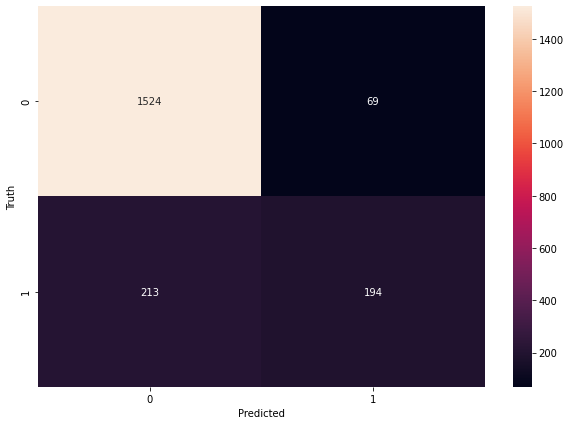

In [60]:
c

In [61]:
# printing accuracy
from sklearn.metrics  import accuracy_score
accuracy_score(y_test,y_pred)

0.859